In [7]:
import gym

In [8]:
# all of the titles we will be general game playing on
gymEnvNames = ['Alien-v0','Asteroids-v0','Atlantis-v0','BankHeist-v0',
               'BattleZone-v0','Bowling-v0','Boxing-v0','Centipede-v0',
               'ChopperCommand-v0','DoubleDunk-v0','FishingDerby-v0',
               'Freeway-v0','Frostbite-v0','Gravitar-v0','Hero-v0',
               'IceHockey-v0','Jamesbond-v0','Kangaroo-v0','Krull-v0',
               'KungFuMaster-v0','MsPacman-v0','PrivateEye-v0',
               'RoadRunner-v0','Skiing-v0','Tennis-v0','TimePilot-v0',
               'UpNDown-v0','Venture-v0','WizardOfWor-v0','Zaxxon-v0']

In [12]:
# test to see if faster to create new env everytime, or serialize, for mp
import multiprocessing as mp
import time

# functions to test gym env access methods

# just create new env every time
def funCreate(envName):
    tStart = time.time()
    env = gym.make(envName)
    env.close()
    tEnd = (time.time() - tStart) * 1000
    
    return tEnd
    
# or load from a queue (serializes and deserializes)
def funLoad(args):
    eq = args[0]
    qt = args[1]
    
    tStart = time.time()
    env = eq.get()
    eq.put(env)
    tEnd = (time.time() - tStart) * 1000
    
    qt.append(tEnd)

In [14]:
# track times to create / use queue with multiprocessing
createTimes = []
queueTimes = []

# create
for envName in gymEnvNames:
    print('on envName:', envName)
    for i in range(10): # repeat 10 times for stochasticity
        createTimes.append(funCreate(envName))

# create all envs at once, don't count time, because it would only happen
# once, at the very begining of a huge run
envs = []
for envName in gymEnvNames:
    envs.append(gym.make(envName))
# use queue / load
pool = mp.Pool(processes=1)
m = mp.Manager()
qTimes = m.list()
for env in envs:
    print('on env:', env.env)
    envQueue = m.Queue()
    envQueue.put(env)
    pool.map(funLoad, [(envQueue, qTimes)]*10) # repeat 10 times
    
for time in qTimes: # put in normal list
    queueTimes.append(time)

on envName: Alien-v0


/home/ryan/git/gym/gym/__init__.py:22: UserWarning: DEPRECATION WARNING: to improve load times, gym no longer automatically loads gym.spaces. Please run "import gym.spaces" to load gym.spaces on your own. This warning will turn into an error in a future version of gym.
  warnings.warn('DEPRECATION WARNING: to improve load times, gym no longer automatically loads gym.spaces. Please run "import gym.spaces" to load gym.spaces on your own. This warning will turn into an error in a future version of gym.')


on envName: Asteroids-v0
on envName: Atlantis-v0
on envName: BankHeist-v0
on envName: BattleZone-v0
on envName: Bowling-v0
on envName: Boxing-v0
on envName: Centipede-v0
on envName: ChopperCommand-v0
on envName: DoubleDunk-v0
on envName: FishingDerby-v0
on envName: Freeway-v0
on envName: Frostbite-v0
on envName: Gravitar-v0
on envName: Hero-v0
on envName: IceHockey-v0
on envName: Jamesbond-v0
on envName: Kangaroo-v0
on envName: Krull-v0
on envName: KungFuMaster-v0
on envName: MsPacman-v0
on envName: PrivateEye-v0
on envName: RoadRunner-v0
on envName: Skiing-v0
on envName: Tennis-v0
on envName: TimePilot-v0
on envName: UpNDown-v0
on envName: Venture-v0
on envName: WizardOfWor-v0
on envName: Zaxxon-v0
on env: <AtariEnv<Alien-v0>>
on env: <AtariEnv<Asteroids-v0>>
on env: <AtariEnv<Atlantis-v0>>
on env: <AtariEnv<BankHeist-v0>>
on env: <AtariEnv<BattleZone-v0>>
on env: <AtariEnv<Bowling-v0>>
on env: <AtariEnv<Boxing-v0>>
on env: <AtariEnv<Centipede-v0>>
on env: <AtariEnv<ChopperCommand-v0>

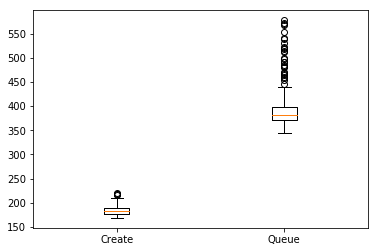

In [18]:
# plot results
import matplotlib.pyplot as plt
plt.boxplot([createTimes,queueTimes], labels=['Create', 'Queue'])
plt.show()

So it is certainly much faster to create a new environment (for these Atari ones at-least) than to pass it over in a queue for multiprocessing. Though episodes are so long it doesn't matter too much.